In [1]:
pip install wikipedia

In [2]:
pip install scikit-network

Note: you may need to restart the kernel to use updated packages.


In [3]:
##Using Wikipedia Webcrawler

In [4]:
import wikipedia as w
import pandas as pd

from time import sleep

In [5]:
def search_wiki(search_list):

    origin_pages = []
    found_pages = []

    # later, we will drop these to keep the properly named page in the network

    for search in search_list:

        print('searching topic: {}'.format(search))
        
        try:
            #page = w.page(search)
            #search_results = page.links
            search_results = w.search(search)

            for found_page in search_results:

                origin_pages.append(search)
                found_pages.append(found_page)

        except:
            
            print('not found')
            
        sleep(0.3)
        
    return origin_pages, found_pages

In [6]:
def create_edgelist_df(seed_searches, iterations=2):

    completed = []
    sources = []
    targets = []

    for i in range(iterations):
        
        print('starting iteration: {}'.format(i))
        print()

        if i == 0:

            search_list = seed_searches

        origin_pages, found_pages = search_wiki(search_list)

        completed.extend(origin_pages)
        sources.extend(origin_pages)
        targets.extend(found_pages)

        search_list = sorted(set([t for t in targets if t not in completed]))
        print(len(search_list))
        print()
        print(search_list)
        print()
        
    df = pd.DataFrame(list(zip(sources, targets)))
    df.columns = ['source', 'target']
                  
    return df

In [7]:
seed_searches = ['emilie du chatelet']

df = create_edgelist_df(seed_searches, iterations=3) # keep it low (1-3) or this will take forever

starting iteration: 0

searching topic: emilie du chatelet
10

['Châtelet', 'Conservation of energy', 'Kinetic energy', 'Legacy of Light', 'Louis Marie Florent du Châtelet', 'Lycée Émilie du Châtelet', 'Polymath', 'Voltaire', 'Émilie', 'Émilie du Châtelet']

starting iteration: 1

searching topic: Châtelet
searching topic: Conservation of energy
searching topic: Kinetic energy
searching topic: Legacy of Light
searching topic: Louis Marie Florent du Châtelet
searching topic: Lycée Émilie du Châtelet
searching topic: Polymath
searching topic: Voltaire
searching topic: Émilie
searching topic: Émilie du Châtelet
79

['Aurelio Voltaire', 'Bailly-Romainvilliers', 'Cabaret Voltaire', 'Cabaret Voltaire (Zurich)', 'Chessy, Seine-et-Marne', 'Château de Cirey', 'Châtelet station', 'Châtelet, Belgium', 'Châtelet–Les Halles station', 'Claude François Chauveau-Lagarde', 'Conservation', 'Conservation law', 'Conservation of mass', 'Dionne quintuplets', 'Edward Marsh (polymath)', 'Energy', 'Energy cons

In [8]:
df.shape

(900, 2)

In [9]:
df.head()

,source,target
0,emilie du chatelet,Émilie du Châtelet
1,emilie du chatelet,Châtelet
2,emilie du chatelet,Lycée Émilie du Châtelet
3,emilie du chatelet,Émilie
4,emilie du chatelet,Conservation of energy


In [10]:
outfile = 'desktop/emilie_edgelist.csv'

df.to_csv(outfile, index=False)

In [11]:
# verify the outfile looks good

df = pd.read_csv(outfile)
df.head()

,source,target
0,emilie du chatelet,Émilie du Châtelet
1,emilie du chatelet,Châtelet
2,emilie du chatelet,Lycée Émilie du Châtelet
3,emilie du chatelet,Émilie
4,emilie du chatelet,Conservation of energy


In [12]:
df.shape

(900, 2)

In [13]:
### Analysis Part 2

In [14]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [15]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [16]:
data = r'desktop/emilie_edgelist.csv'

df = pd.read_csv(data)
df.head()

,source,target
0,emilie du chatelet,Émilie du Châtelet
1,emilie du chatelet,Châtelet
2,emilie du chatelet,Lycée Émilie du Châtelet
3,emilie du chatelet,Émilie
4,emilie du chatelet,Conservation of energy


In [51]:
G = nx.from_pandas_edgelist(df)
G.remove_edges_from(nx.selfloop_edges(G))

# drop the seed nodes; we will have proper names from pages found
##seed_nodes = ['Émilie du Châtelet', 'Châtelet', 'Lycée Émilie du Châtelet', 'Émilie']


drop_nodes = ['Tron: Legacy', 'Subaru Legacy', 'Sharon Leal', 'Stephen Schnetzer', 'Legacy of Kain', 'Ryan Spann', "Jupiter's Legacy (TV series)", 'Dionne quintuplets', 'Moors', 'Lauren Gunderson', 'Ottoman Empire', 'Legacy of Light', "The Time Traveller's Wife (musical)", 'Lauren', 'Bree Lowdermilk', 'Maisie Williams', 'Song of Myself', 'Leaves of Grass', 'Aurelio Voltaire', 'Émilie Caen' ]

G.remove_nodes_from(drop_nodes)

In [52]:
print(G)

Graph with 635 nodes and 651 edges


In [53]:
import networkx as nx

In [54]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

  import numpy as np
  from IPython.display import SVG
  from sknetwork.visualization import svg_graph
  from sknetwork.data import Bunch
  from sknetwork.ranking import PageRank
  from scipy.sparse import csr_matrix

  adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
  adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
  names = np.array(list(G.nodes))
  graph = Bunch()
  graph.adjacency = adjacency
  graph.names = np.array(names)
  pagerank = PageRank()
  scores = pagerank.fit_transform(adjacency)

  if show_names:
    image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
  else:
    image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
  return SVG(image)

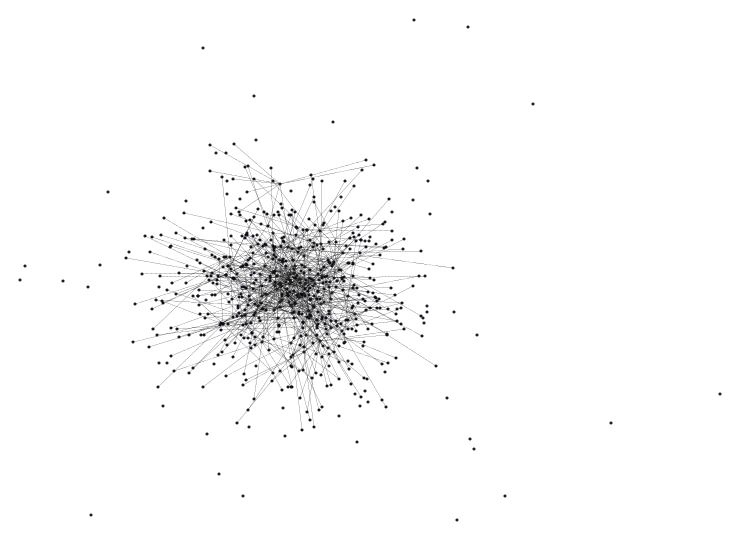

In [55]:
draw_graph(G, node_size=1, show_names=False, edge_width=0.1)

In [56]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(20)

,page_rank
Energy,0.009241
Polymath (disambiguation),0.009133
Hogwarts Legacy,0.008845
Philomath,0.008511
Voltaire (disambiguation),0.008478
List of schools in France,0.008300
List of French generals of the Revolutionary and Napoleonic Wars,0.008214
Louis-Marie,0.008214
Claude François Chauveau-Lagarde,0.008214
Kinetic theory of gases,0.008213


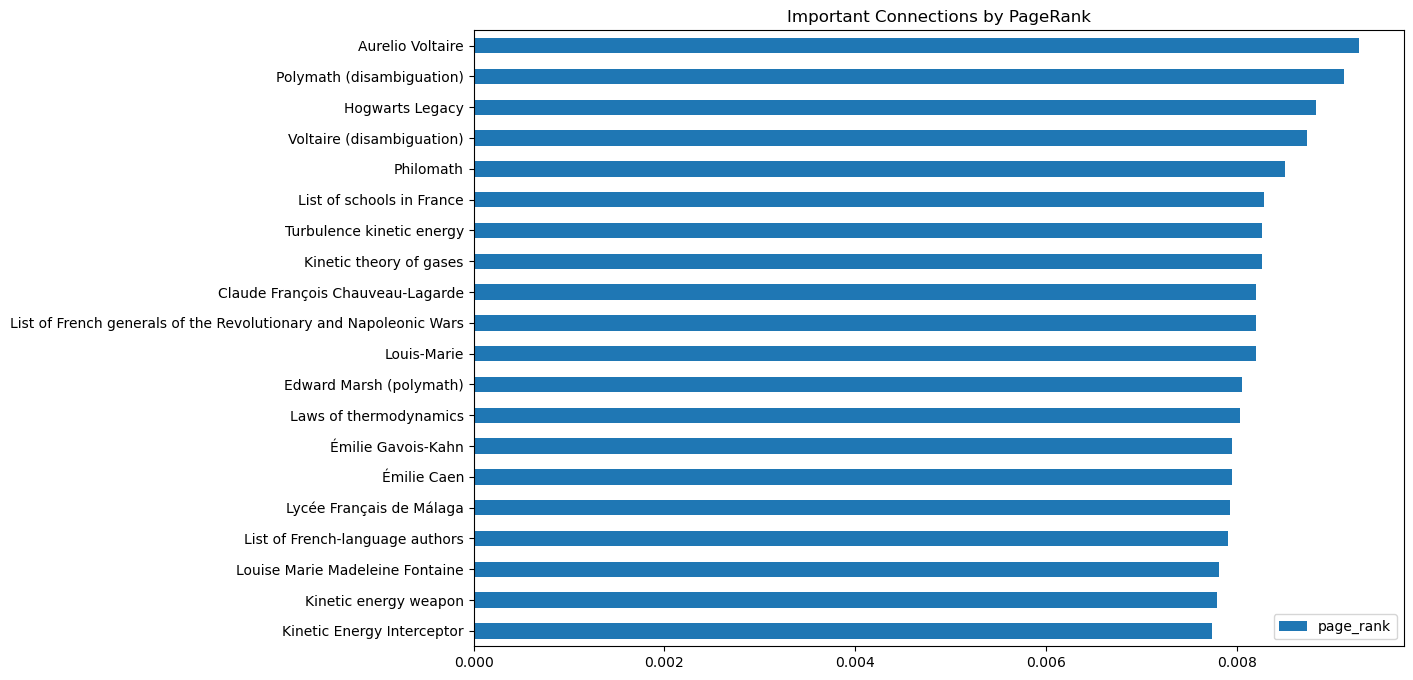

In [49]:
title = 'Important Connections by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

In [24]:
top_nodes = pr_df.head(20).index.values

In [25]:
top_nodes[0]

'Aurelio Voltaire'

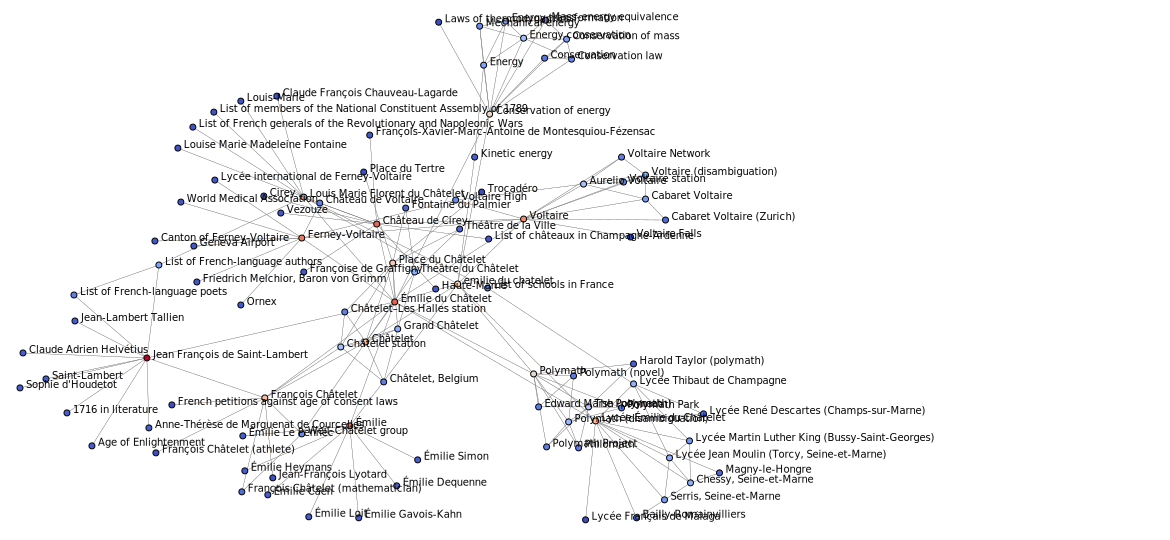

In [50]:
ego = 'Émilie du Châtelet'

G_ego = nx.ego_graph(G, ego, radius=2)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

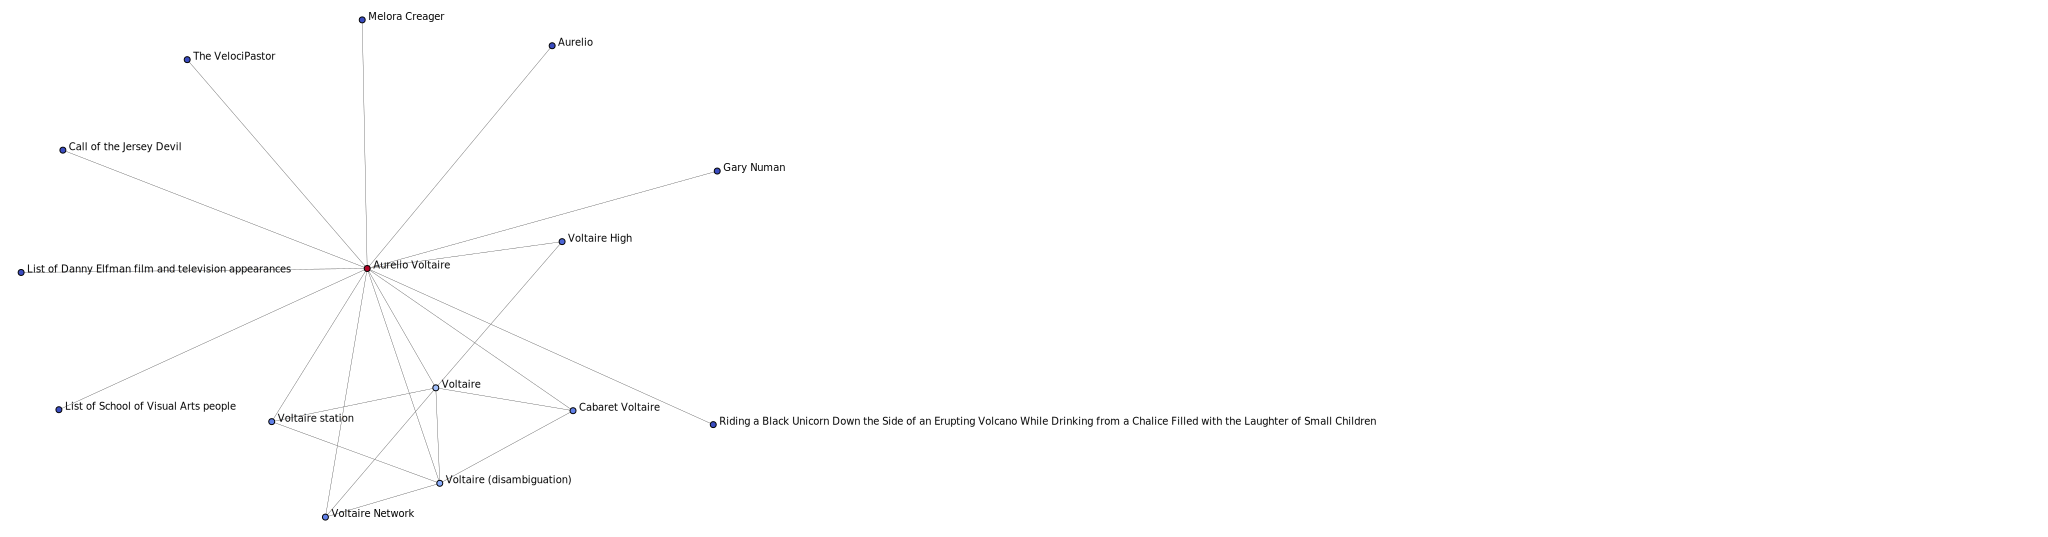

In [27]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [28]:
# you can look at the nodes in the ego network this way, to find interesting topics

nodes = sorted(G_ego.nodes)
nodes

['Aurelio',
 'Aurelio Voltaire',
 'Cabaret Voltaire',
 'Call of the Jersey Devil',
 'Gary Numan',
 'List of Danny Elfman film and television appearances',
 'List of School of Visual Arts people',
 'Melora Creager',
 'Riding a Black Unicorn Down the Side of an Erupting Volcano While Drinking from a Chalice Filled with the Laughter of Small Children',
 'The VelociPastor',
 'Voltaire',
 'Voltaire (disambiguation)',
 'Voltaire High',
 'Voltaire Network',
 'Voltaire station']

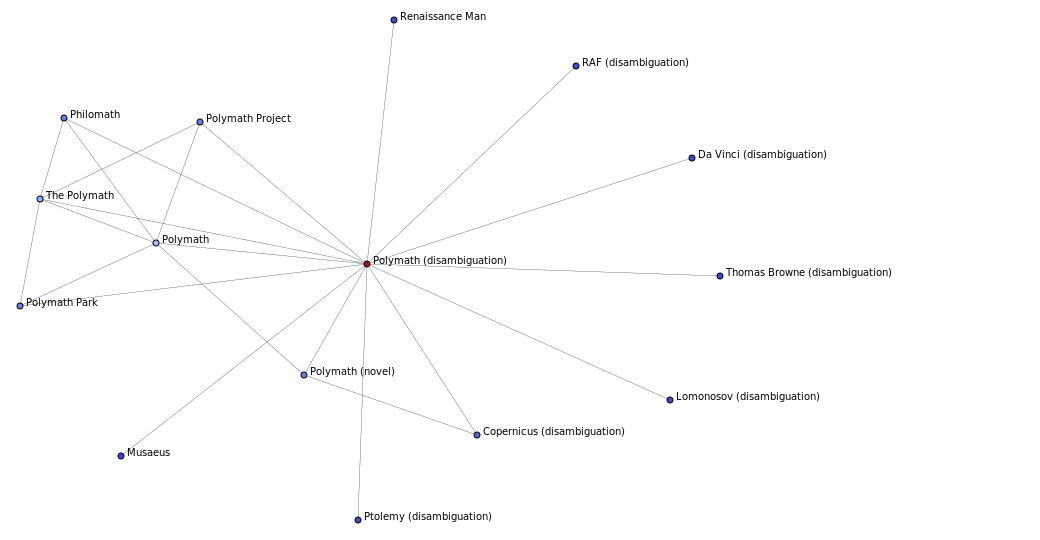

In [29]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

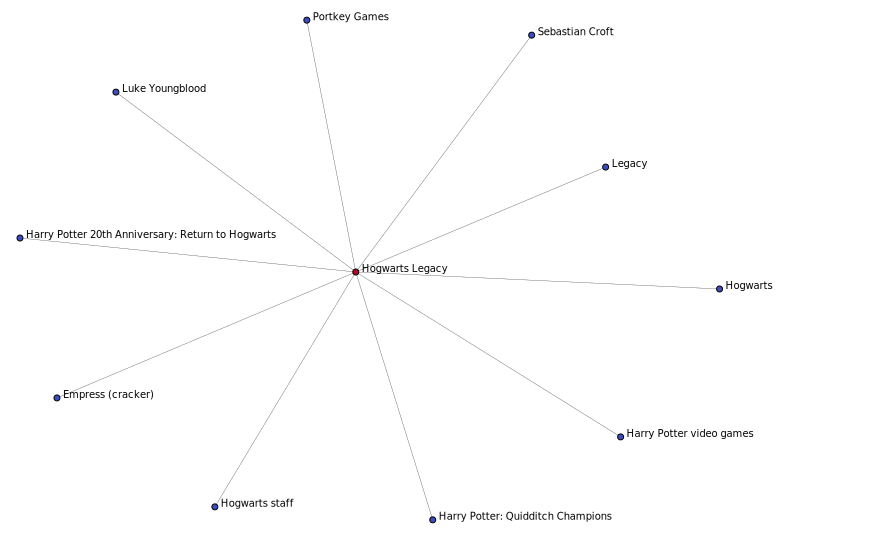

In [30]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

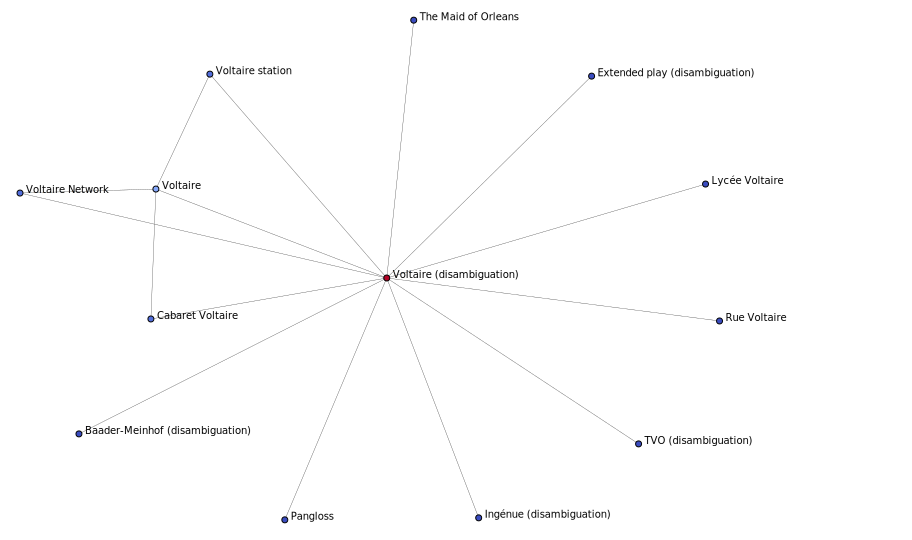

In [57]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

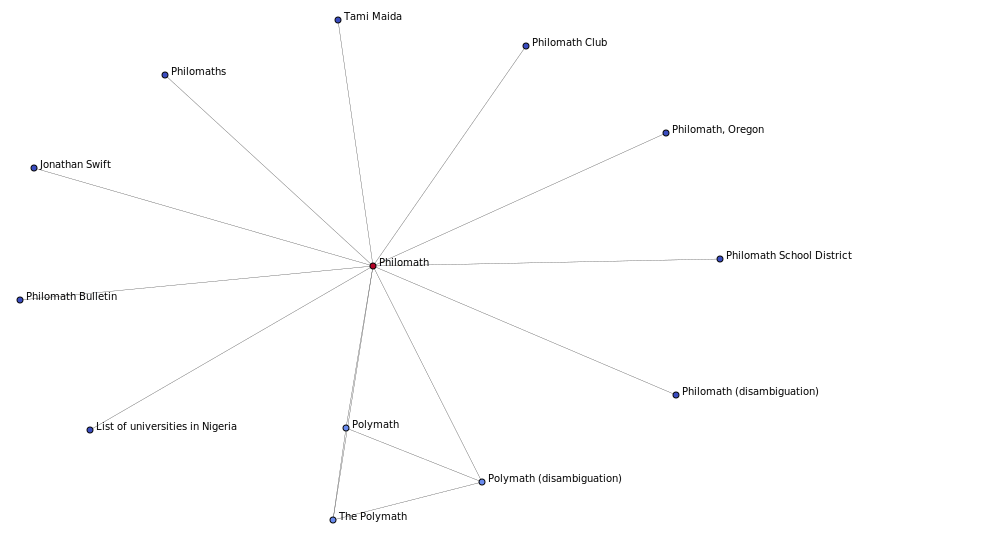

In [32]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

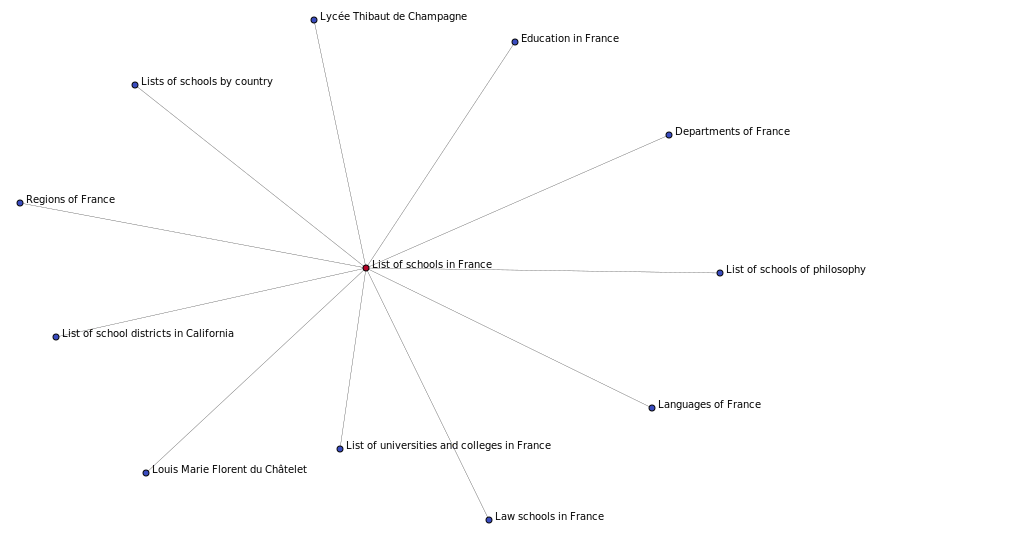

In [33]:
ego = top_nodes[5]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

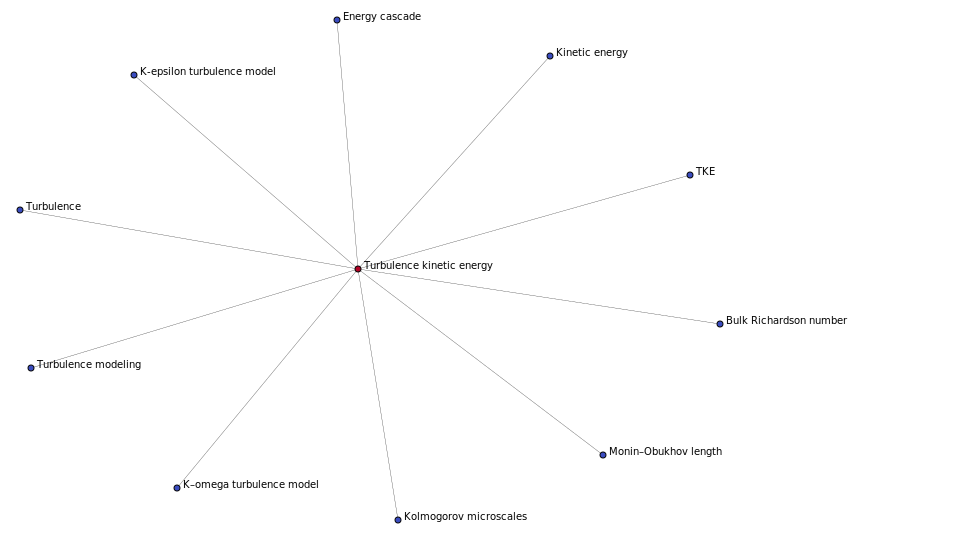

In [34]:
ego = top_nodes[6]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

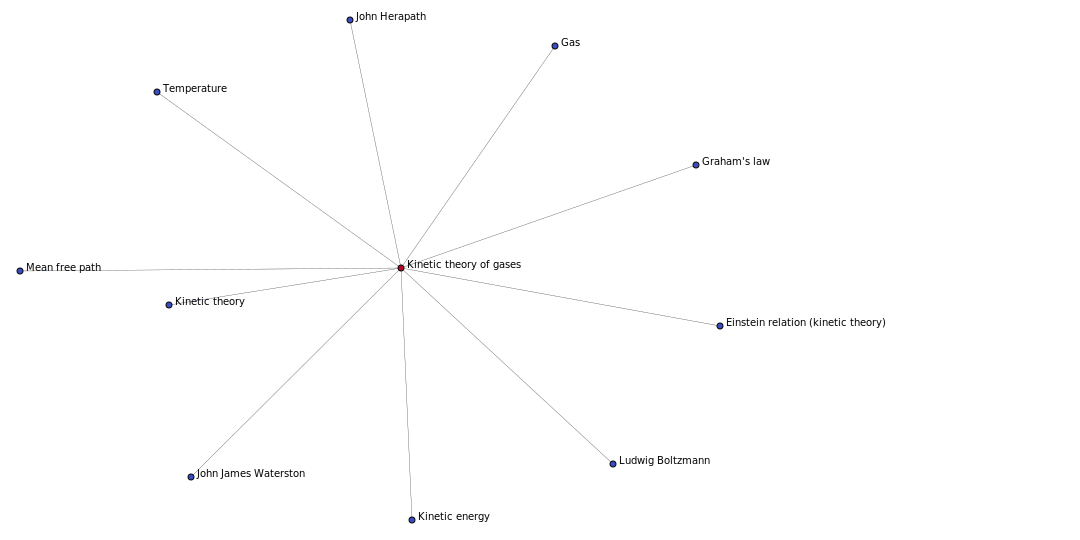

In [35]:
ego = top_nodes[7]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [36]:
##Community Detection

In [37]:
def draw_partition(G, partition): 

    import matplotlib.cm as cm 
    import matplotlib.pyplot as plt 

    # draw the graph 
    plt.figure(3,figsize=(12,12)) 
    pos = nx.spring_layout(G) 

    # color the nodes according to their partition 
    cmap = cm.get_cmap('jet', max(partition.values()) + 1) 
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values())) 
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3) 

    return plt.show() 

In [38]:
!pip install python-louvain
from community import community_louvain

In [39]:
# identify communities; set resolution to 0.01 for smaller groups and 1 for larger groups, etc
# play with the number to get communities to the size you want them, or leave it at the default

partition = community_louvain.best_partition(G, resolution=1, random_state=1337) 

In [40]:
community_df = pd.DataFrame().from_dict(partition, orient='index')
community_df.reset_index(inplace=True)
community_df.columns = ['node', 'community']

# remove junk; identify relevant communities
##community_df = community_df[community_df['node'].str.contains('cleopatra|antony|kleopatra|ceasar')]

community_df['community'].value_counts()[0:20]

community
15    52
3     46
21    46
1     44
18    43
6     32
0     31
5     31
11    27
28    19
19    18
9     17
4     14
17    10
12    10
14    10
13    10
10    10
8     10
7     10
Name: count, dtype: int64

In [59]:
##Exploring Communities

In [60]:
nodes = community_df[community_df['community']==comm_idx[0]]['node'].values

G_comm = G.subgraph(nodes)
G_net_main = G_comm.copy() # we will run community detection off of this at the end
##G.remove_edges_from(nx.selfloop_edges(G)) -- bug fix for other code
##g = nx.DiGraph() -- bug fix for other code

draw_graph(nx.k_core(G_comm, 5), show_names=True, node_size=3)

NetworkXError: Graph has no nodes or edges

In [61]:
netsci_nodes = [n for n in sorted(G_net_main.nodes)]
[print(n) for n in netsci_nodes]

Avon, Seine-et-Marne
Bailly
Bailly-Romainvilliers
Barbizon
Bry-sur-Marne station
Bussy-Saint-Georges
Bussy-Saint-Georges station
Bussy-Saint-Martin
Cantons of the Seine-et-Marne department
Champs-sur-Marne
Chelles, Seine-et-Marne
Chessy
Chessy, Seine-et-Marne
Château de Champs-sur-Marne
Communes of the Seine-et-Marne department
Coulommiers, Seine-et-Marne
Disneyland Paris
Fontainebleau
Guermantes
Josephine, Guardian Angel
Just Riadh
Lagny-sur-Marne
List of Huguenots
List of places named after Pierre Brossolette
Lognes station
Lycée Descartes
Lycée Jean Moulin (Torcy, Seine-et-Marne)
Lycée Jean-Moulin
Lycée Martin Luther King
Lycée Martin Luther King (Bussy-Saint-Georges)
Lycée René Descartes (Champs-sur-Marne)
Lycée Thibaut de Champagne
Lésigny, Seine-et-Marne
Magny
Magny-le-Hongre
Marne-la-Vallée
Marne-la-Vallée–Chessy station
Messy, Seine-et-Marne
Noisiel
Noisiel station
Noisy-le-Grand
Noisy–Champs station
Provins
Saint-Siméon, Seine-et-Marne
Saint-Thibault-des-Vignes
Serris, Seine-e

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
##More Communities

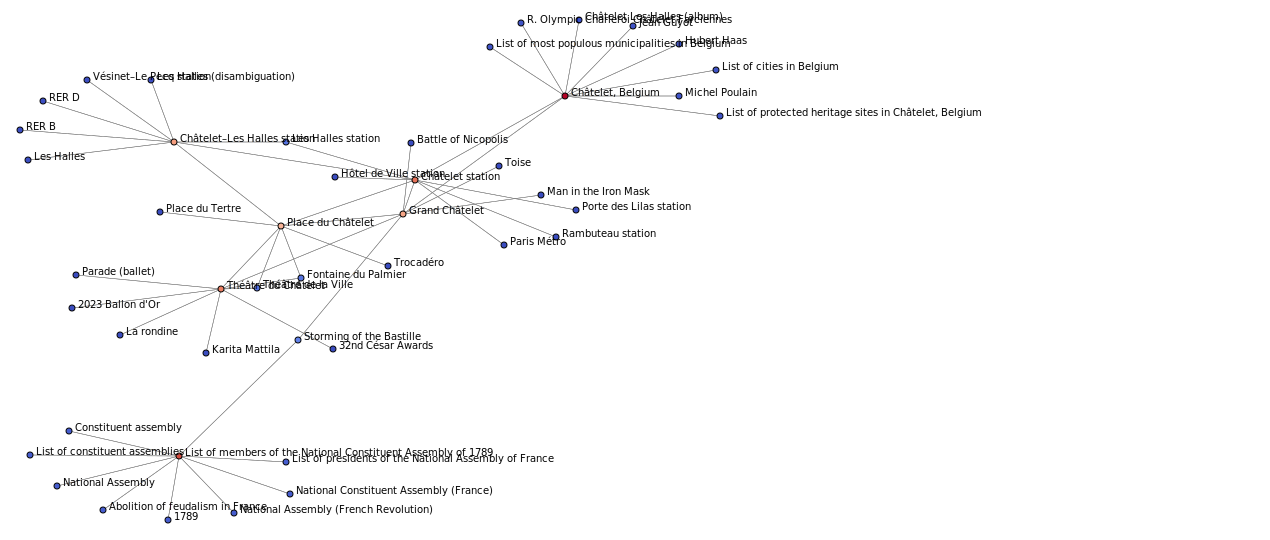

In [62]:
nodes = community_df[community_df['community']==comm_idx[1]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [63]:
[print(n) for n in sorted(G_comm.nodes)]

1789
2023 Ballon d'Or
32nd César Awards
Abolition of feudalism in France
Battle of Nicopolis
Châtelet Les Halles (album)
Châtelet station
Châtelet, Belgium
Châtelet–Les Halles station
Constituent assembly
Fontaine du Palmier
Grand Châtelet
Hubert Haas
Hôtel de Ville station
Jean Guyot
Karita Mattila
La rondine
Les Halles
Les Halles (disambiguation)
Les Halles station
List of cities in Belgium
List of constituent assemblies
List of members of the National Constituent Assembly of 1789
List of most populous municipalities in Belgium
List of presidents of the National Assembly of France
List of protected heritage sites in Châtelet, Belgium
Man in the Iron Mask
Michel Poulain
National Assembly
National Assembly (French Revolution)
National Constituent Assembly (France)
Parade (ballet)
Paris Métro
Place du Châtelet
Place du Tertre
Porte des Lilas station
R. Olympic Charleroi Châtelet Farciennes
RER B
RER D
Rambuteau station
Storming of the Bastille
Théâtre de la Ville
Théâtre du Châtelet
Toi

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

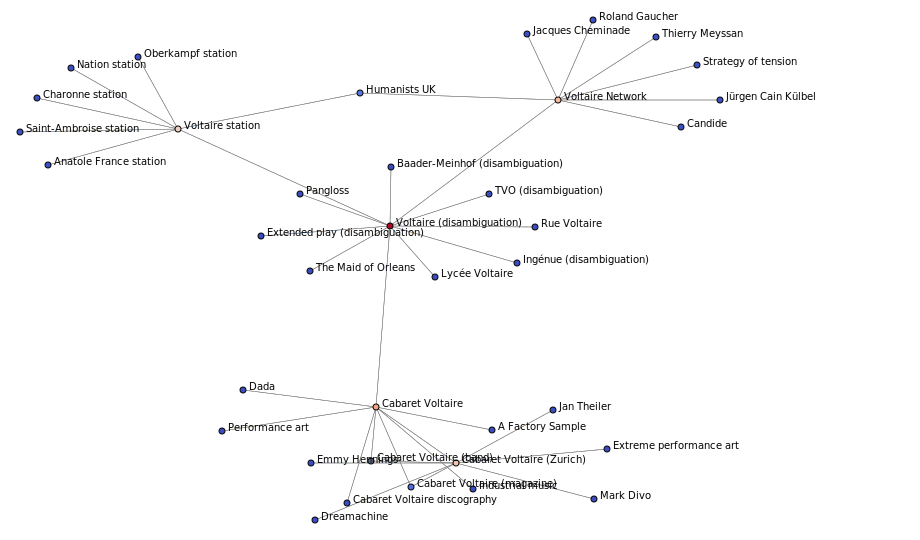

In [64]:
nodes = community_df[community_df['community']==comm_idx[2]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [65]:
[print(n) for n in sorted(G_comm.nodes)]

A Factory Sample
Anatole France station
Aurelio
Baader-Meinhof (disambiguation)
Cabaret Voltaire
Cabaret Voltaire (Zurich)
Cabaret Voltaire (band)
Cabaret Voltaire (magazine)
Cabaret Voltaire discography
Call of the Jersey Devil
Candide
Charonne station
Dada
Dreamachine
Emmy Hennings
Extended play (disambiguation)
Extreme performance art
Gary Numan
Humanists UK
Industrial music
Ingénue (disambiguation)
Jacques Cheminade
Jan Theiler
Jürgen Cain Külbel
List of Danny Elfman film and television appearances
List of School of Visual Arts people
Lycée Voltaire
Mark Divo
Melora Creager
Nation station
Oberkampf station
Pangloss
Performance art
Riding a Black Unicorn Down the Side of an Erupting Volcano While Drinking from a Chalice Filled with the Laughter of Small Children
Roland Gaucher
Rue Voltaire
Saint-Ambroise station
Strategy of tension
TVO (disambiguation)
The Maid of Orleans
The VelociPastor
Thierry Meyssan
Voltaire (disambiguation)
Voltaire Network
Voltaire station


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

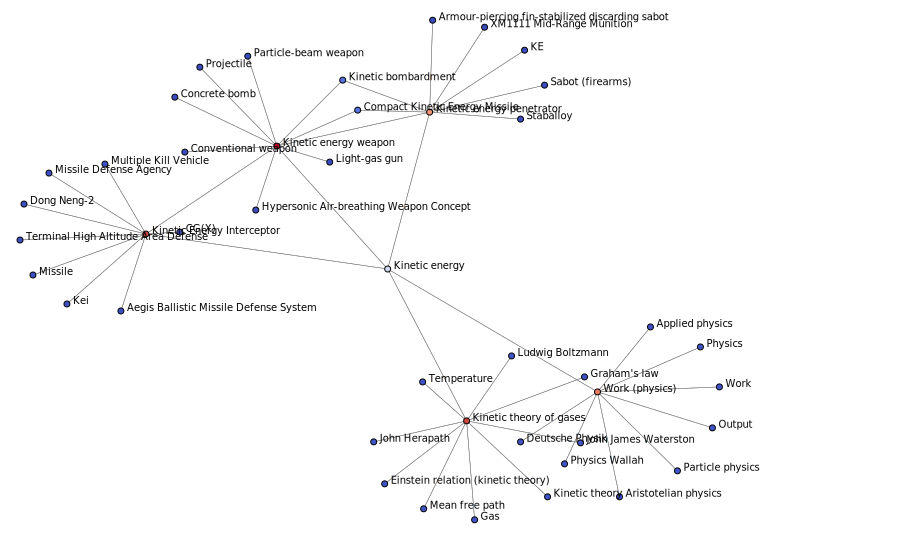

In [66]:
nodes = community_df[community_df['community']==comm_idx[3]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [67]:
[print(n) for n in sorted(G_comm.nodes)]

Aegis Ballistic Missile Defense System
Applied physics
Aristotelian physics
Armour-piercing fin-stabilized discarding sabot
CG(X)
Compact Kinetic Energy Missile
Concrete bomb
Conventional weapon
Deutsche Physik
Dong Neng-2
Einstein relation (kinetic theory)
Gas
Graham's law
Hypersonic Air-breathing Weapon Concept
John Herapath
John James Waterston
KE
Kei
Kinetic Energy Interceptor
Kinetic bombardment
Kinetic energy
Kinetic energy penetrator
Kinetic energy weapon
Kinetic theory
Kinetic theory of gases
Light-gas gun
Ludwig Boltzmann
Mean free path
Missile
Missile Defense Agency
Multiple Kill Vehicle
Output
Particle physics
Particle-beam weapon
Physics
Physics Wallah
Projectile
Sabot (firearms)
Staballoy
Temperature
Terminal High Altitude Area Defense
Work
Work (physics)
XM1111 Mid-Range Munition


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

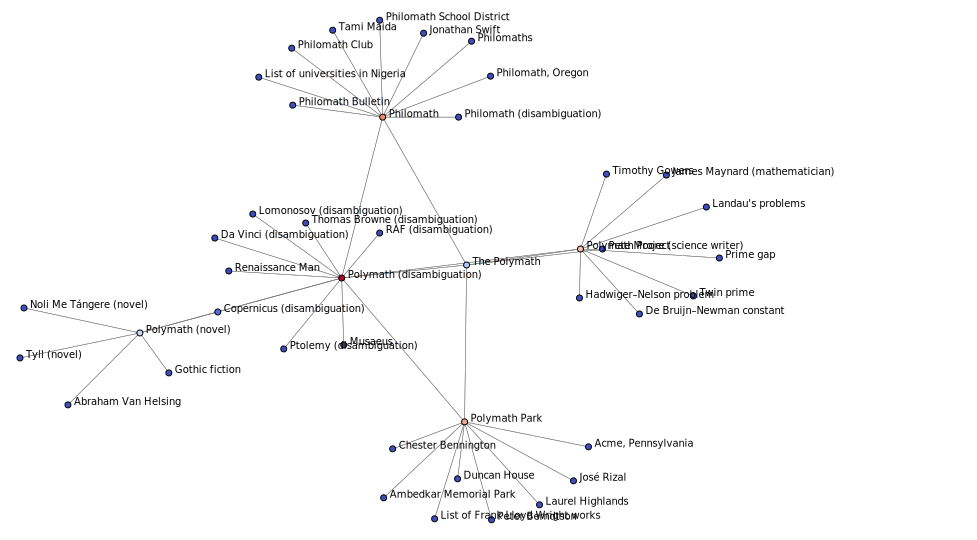

In [68]:
nodes = community_df[community_df['community']==comm_idx[4]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

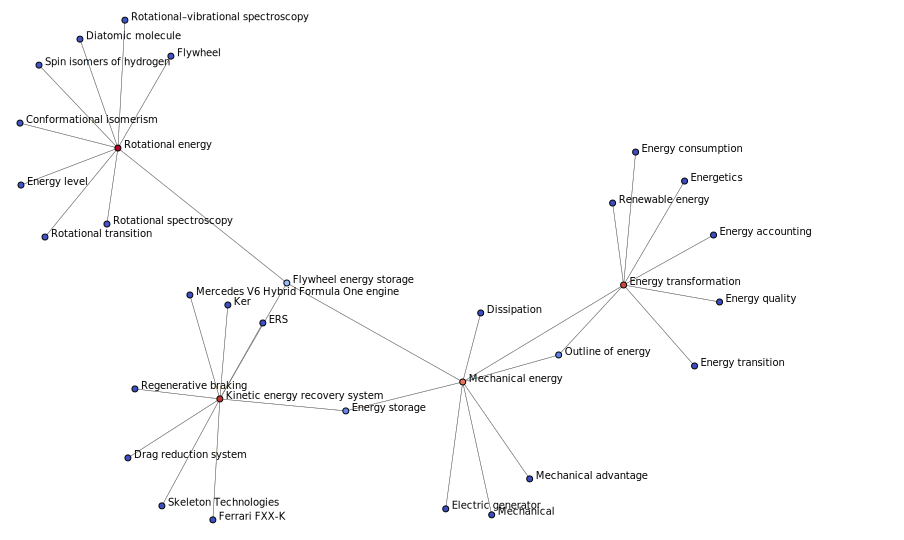

In [69]:
nodes = community_df[community_df['community']==comm_idx[5]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

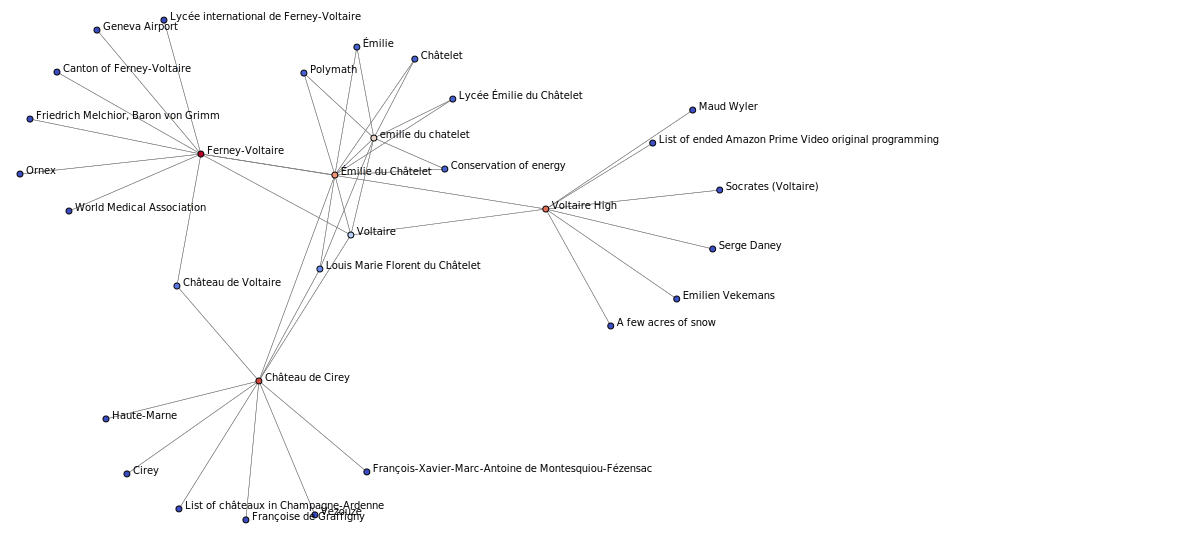

In [70]:
nodes = community_df[community_df['community']==comm_idx[6]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

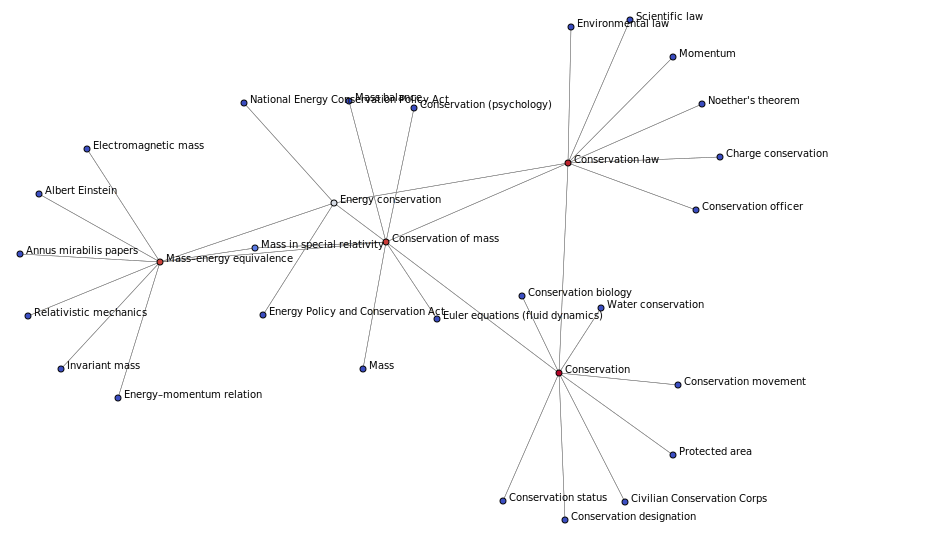

In [71]:
nodes = community_df[community_df['community']==comm_idx[7]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

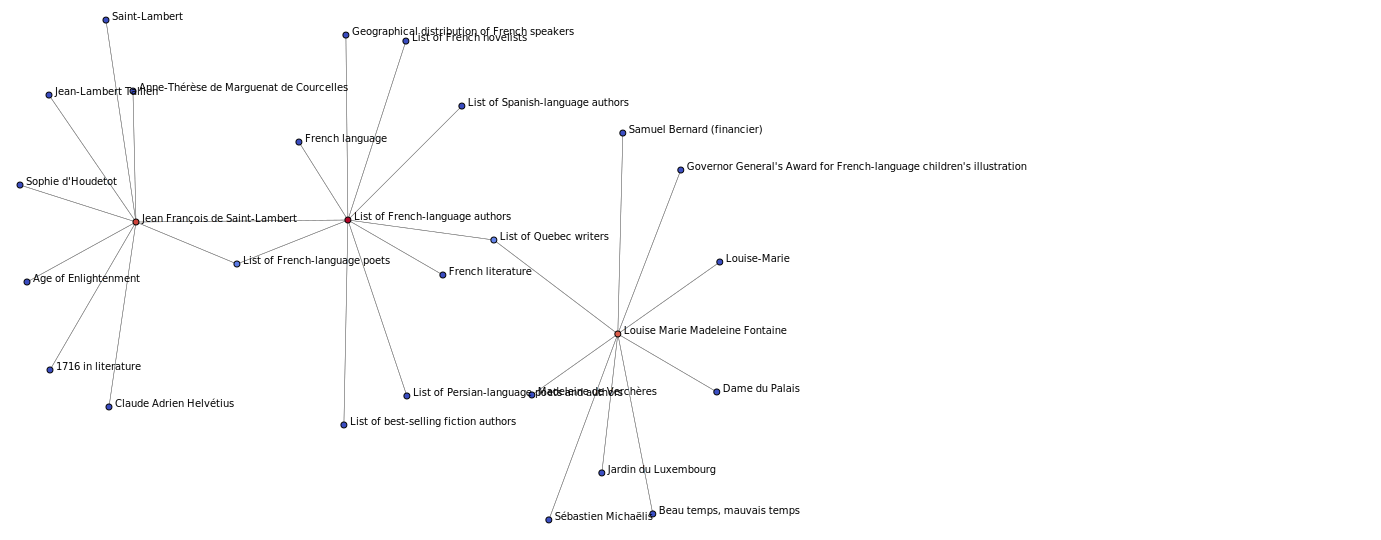

In [72]:
nodes = community_df[community_df['community']==comm_idx[8]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

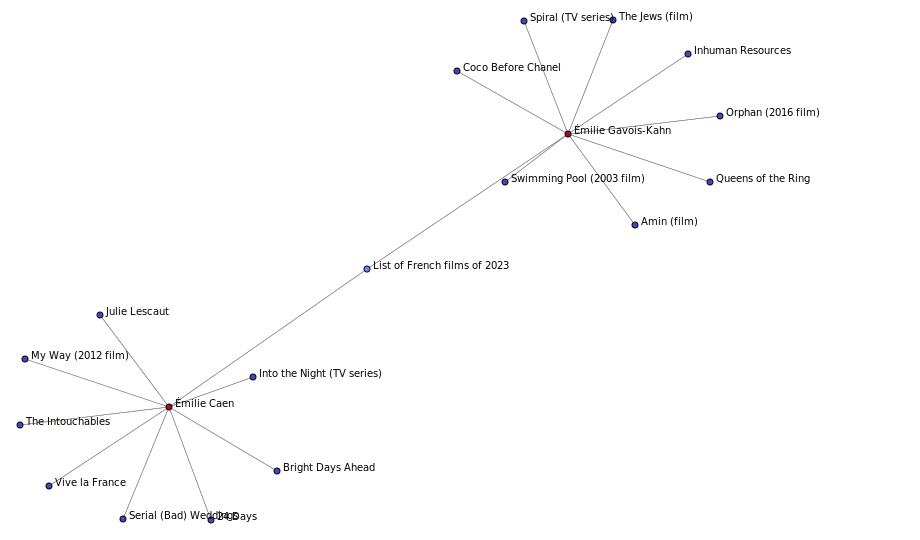

In [73]:
nodes = community_df[community_df['community']==comm_idx[9]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

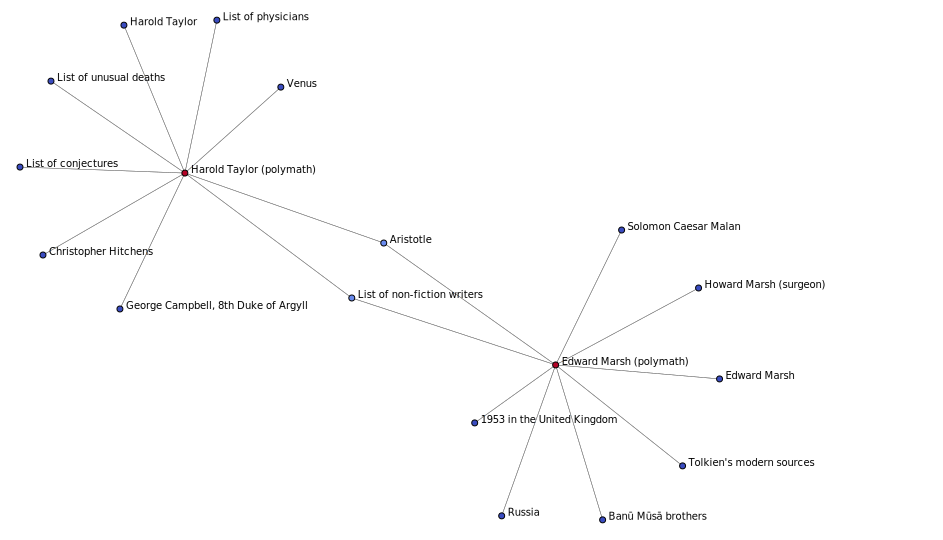

In [74]:
nodes = community_df[community_df['community']==comm_idx[10]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

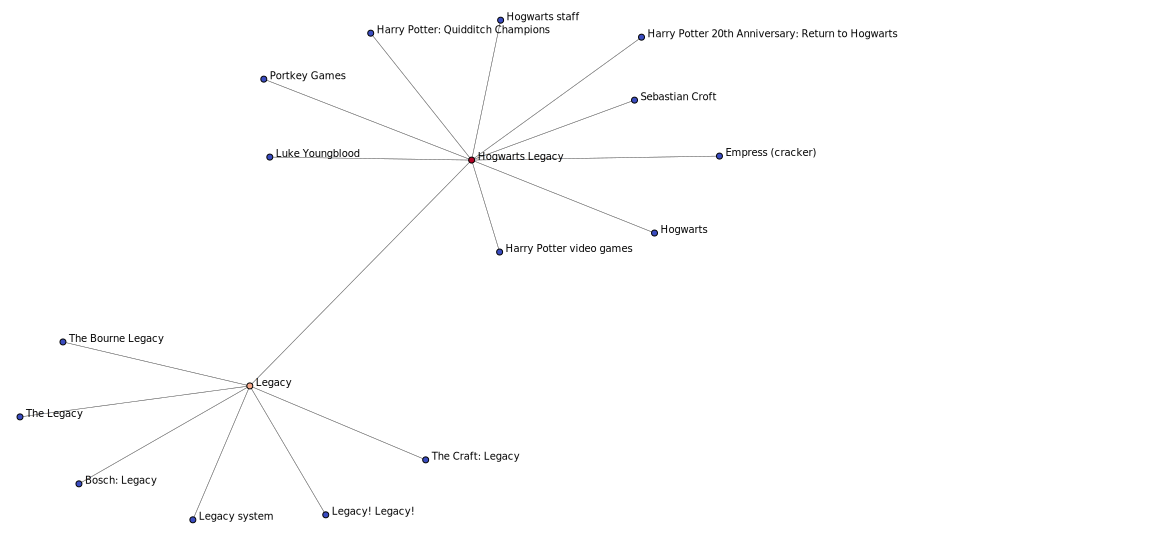

In [75]:
nodes = community_df[community_df['community']==comm_idx[11]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

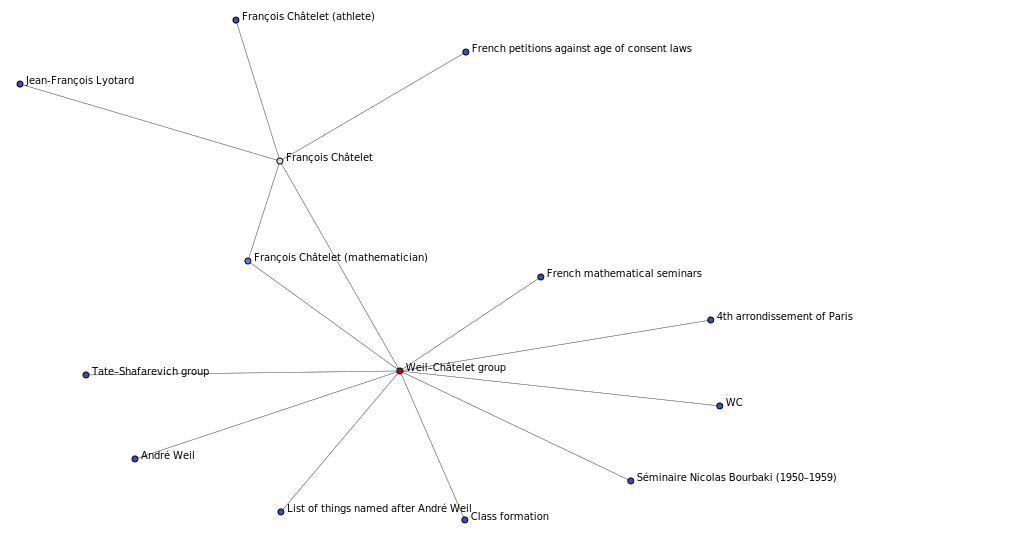

In [76]:
nodes = community_df[community_df['community']==comm_idx[12]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

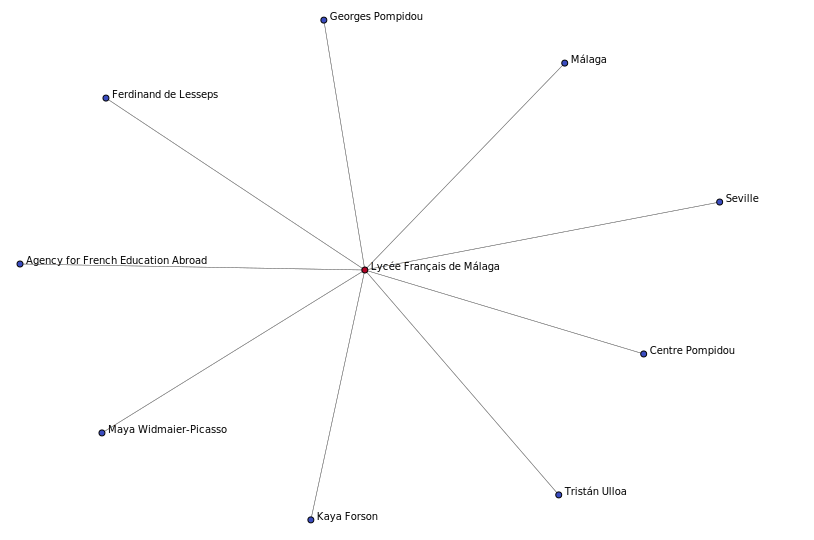

In [77]:
nodes = community_df[community_df['community']==comm_idx[13]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

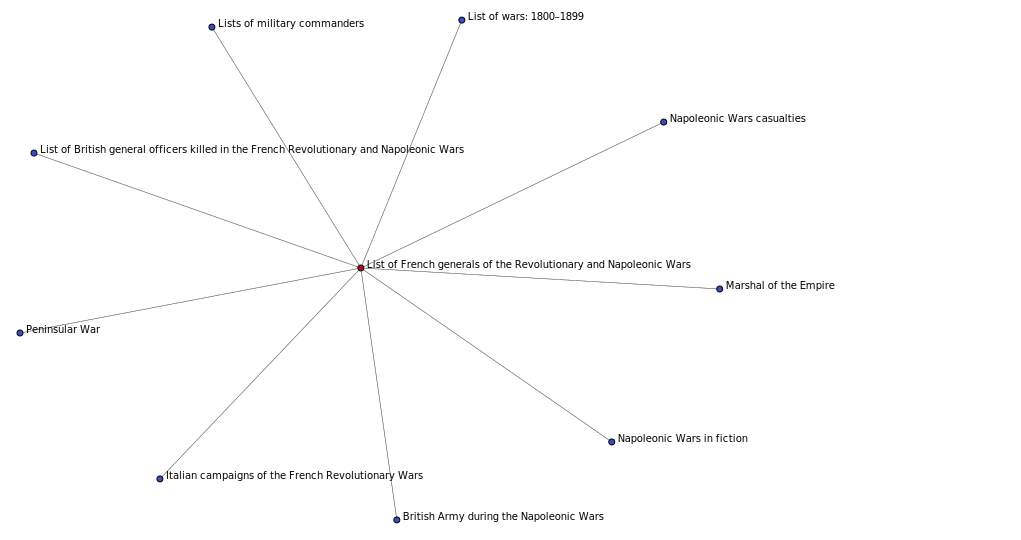

In [78]:
nodes = community_df[community_df['community']==comm_idx[14]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

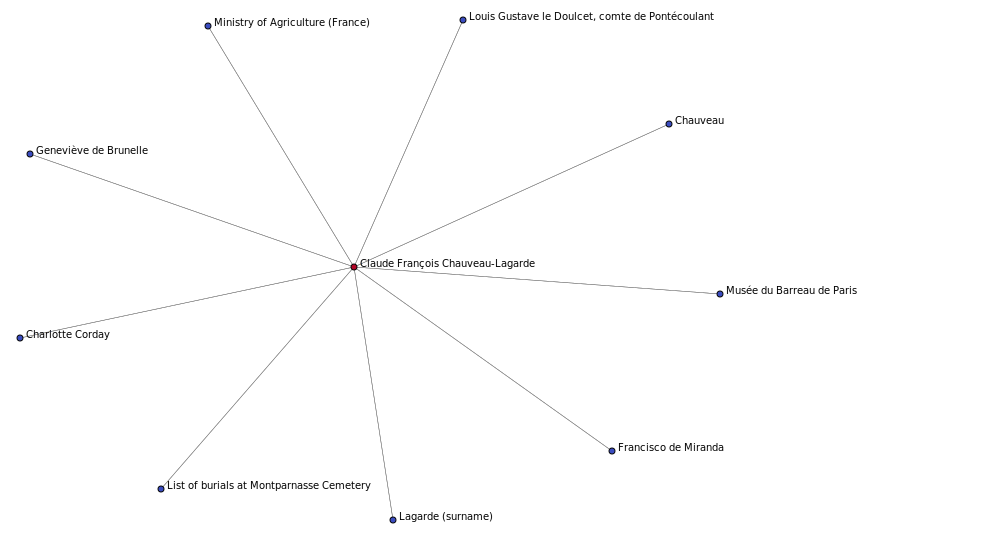

In [79]:
nodes = community_df[community_df['community']==comm_idx[15]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

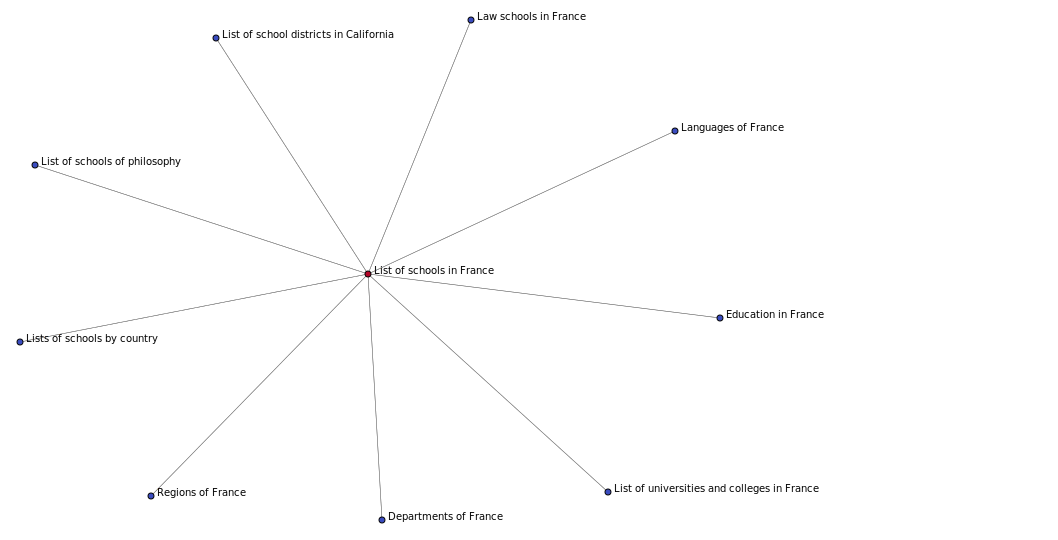

In [80]:
nodes = community_df[community_df['community']==comm_idx[16]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

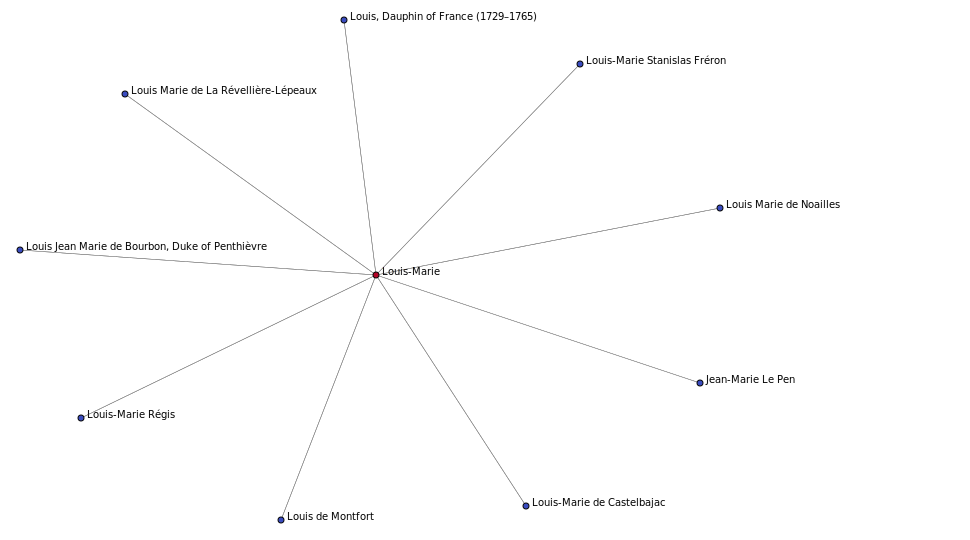

In [81]:
nodes = community_df[community_df['community']==comm_idx[17]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

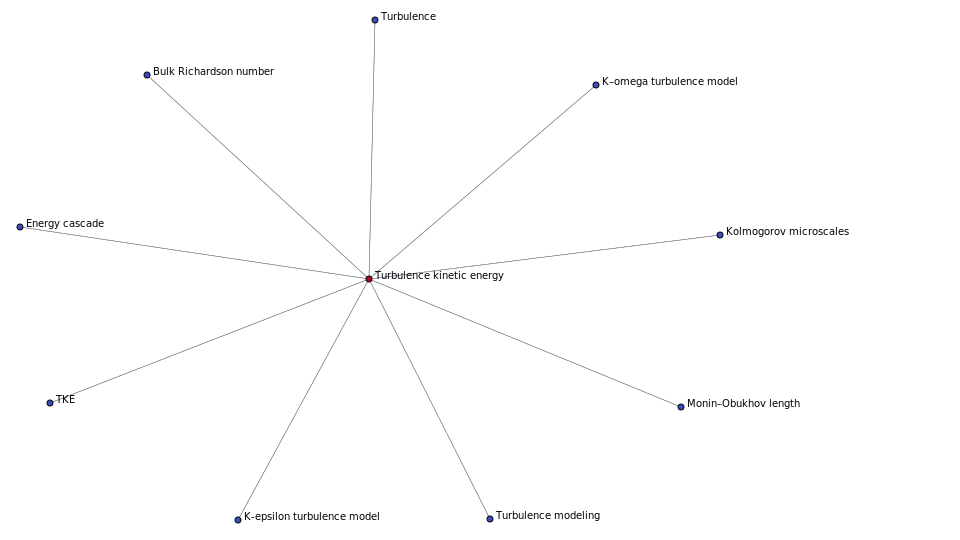

In [82]:
nodes = community_df[community_df['community']==comm_idx[18]]['node'].values

G_comm = G.subgraph(nodes)

draw_graph(nx.k_core(G_comm, 1), show_names=True, node_size=3)

In [ ]:
nx.betweenness_centrality(G)